# 第3週：對ptt美食版進行情緒分析
**Author:** 黃天原<br>
**Date created:** 2021/09/30<br>
**Last modified:** 2021/09/30<br>
本週課程為「情緒分析1」，目的為了解lexicon-base 情緒分析。情緒分析步驟會因所要分析之語言不同而有所差異，在這個Jupyter Notebook當中將會展示「中文」的情緒分析，並且搭配python程式碼進行講解。在後面的內容中，我們將會介紹所使用到的套件、資料前處理、lexicon-base 情緒分析

## 大綱
+ 1. 套件說明
+ 2. 資料前處理
    + 2.1 基本資料介紹
    + 2.2 資料清理
    + 2.3 文章斷詞
+ 3. lexicon-base 情緒分析
    + 3.1 準備LIWC情緒字典
    + 3.2 情緒字典與斷詞結果進行合併
    + 3.3 正負向情緒分數聲量折線圖圖
    + 3.4 正負向情緒分數比例折線圖圖
    + 3.5 文字雲
    + 3.6 情緒代表字
    + 3.7 情緒關鍵字
    + 3.8 與Dcard文集比較

## 1. 套件說明
下面列出在本次實作過程中我們所使用到的相關套件，在這個Jupyter Notebook當中我們將會簡單的展示這些套件的使用方式，關於各個套件的進階使用請同學參照其官網的說明。
- pandas: 一個資料分析的函式庫，提供了DataFrame等資料格式，與資料處理的函數。
- NLTK: 全名為Natural Language Tool Kit，自然語言處理工具。
- re: 正規表達式套件。
- wordcloud: 文字雲繪圖工具。
- matplotlib: 繪圖工具。

In [1]:
# 安裝會使用到的套件
# %pip install wordcloud

In [2]:
# 確認當前工作目錄
%pwd

'/home/evan19983314/SMA/SMA_2023S/week4_sentiment_analysis'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm

from datetime import datetime
from wordcloud import WordCloud 
%matplotlib inline

In [4]:
# plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
fprop = fm.FontProperties(fname='./SourceHanSansTW-Regular.otf')
fprop


# 設定整份 notebook 圖片的長寬與 dpi
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 150


## 2. 資料前處理
如 week3 所示

### 2.1 基本資料介紹
- 資料來源: 工作流程蒐集PTT 美食版 Food 2022-10-31 ~ 2023-02-27 所有文章
- 資料時間：2022-10-31 ~ 2023-02-27

## 3. lexicon-base 情緒分析
進行基於情緒字典的情緒分析，首先需要準備情緒字典後再將字典與斷詞後的文章進行合併

### 3.1 準備LIWC字典  
- 全名Linguistic Inquiry and Word Counts，由心理學家Pennebaker於2001出版  
- 分為正向情緒與負向情緒

In [5]:
# 讀取情緒字典
def load_sentiment_dict(en_dict_pos_path, en_dict_neg_path):
    
    with open(en_dict_pos_path) as f:
        pos_word = [line.strip() for line in f.read().split(",")]
        pos_label = ["positive" for i in range(len(pos_word))]

    with open(en_dict_neg_path) as f:
        neg_word = [line.strip() for line in f.read().split(",")]
        neg_label = ["negative" for i in range(len(neg_word))]
        
    words = pos_word + neg_word
    labels = pos_label + neg_label
    sentiment_dict = pd.DataFrame({"word" : words, "sentiments" : labels})
    return sentiment_dict

liwc_dict = load_sentiment_dict(en_dict_pos_path="./dict/liwc/positive.txt", en_dict_neg_path="./dict/liwc/negative.txt")
liwc_dict

,word,sentiments
0,﻿一流,positive
1,下定決心,positive
2,不拘小節,positive
3,不費力,positive
4,不錯,positive
...,...,...
1706,麻煩,negative
1707,默哀,negative
1708,黯淡,negative
1709,鼻酸,negative


In [6]:
ptt_df = pd.read_csv("../week3_nlp/raw_data/clean_zh_data.csv", index_col=False)
ptt_df['artDate'] = pd.to_datetime(ptt_df['artDate'])
ptt_df

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,word
0,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023-01-31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,餐廳
1,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023-01-31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,徐淮
2,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023-01-31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,消費
3,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023-01-31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,時間
4,[食記]台北中山徐淮人家重口味北方菜不吃辣不要來好下飯,2023-01-31,19:11:08,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,AlphaD,Food,13,7,0,2023
...,...,...,...,...,...,...,...,...,...,...
255312,[食記]台北信義-捌伍添第85TD,2022-12-30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,沙其瑪
255313,[食記]台北信義-捌伍添第85TD,2022-12-30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,蛋捲
255314,[食記]台北信義-捌伍添第85TD,2022-12-30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,不錯
255315,[食記]台北信義-捌伍添第85TD,2022-12-30,15:19:13,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,fickle85,Food,0,0,0,有脆


In [7]:
ptt_df['artDate'].describe()

/home/evan19983314/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  255317
unique                    119
top       2022-11-03 00:00:00
freq                     4284
first     2022-10-31 00:00:00
last      2023-02-27 00:00:00
Name: artDate, dtype: object

### 3.2 情緒字典與斷詞結果進行合併
將情緒字典與斷詞結果進行合併。。

In [8]:
ptt_liwc_df = pd.merge(ptt_df[['artDate','artUrl','word']], liwc_dict, how = 'left')
ptt_liwc_df

,artDate,artUrl,word,sentiments
0,2023-01-31,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,餐廳,NaN
1,2023-01-31,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,徐淮,NaN
2,2023-01-31,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,消費,NaN
3,2023-01-31,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,時間,NaN
4,2023-01-31,https://www.ptt.cc/bbs/Food/M.1675192271.A.E0C...,2023,NaN
...,...,...,...,...
255341,2022-12-30,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,沙其瑪,NaN
255342,2022-12-30,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,蛋捲,NaN
255343,2022-12-30,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,不錯,positive
255344,2022-12-30,https://www.ptt.cc/bbs/Food/M.1672413555.A.BE8...,有脆,NaN


### 3.3 正負向情緒分數聲量折線圖圖
分別畫出文集中，正向（positive）與負向（negative）情緒的折線圖

In [9]:
sentiment_count = pd.DataFrame(ptt_liwc_df.groupby(['artDate', 'sentiments']).size()).reset_index()
sentiment_count = sentiment_count.rename(columns={0: 'size'})
sentiment_count = sentiment_count.sort_values(['artDate'])
sentiment_count

,artDate,sentiments,size
0,2022-10-31,negative,5
1,2022-10-31,positive,13
2,2022-11-01,negative,15
3,2022-11-01,positive,137
4,2022-11-02,negative,11
...,...,...,...
233,2023-02-25,positive,123
234,2023-02-26,negative,13
235,2023-02-26,positive,72
236,2023-02-27,negative,4


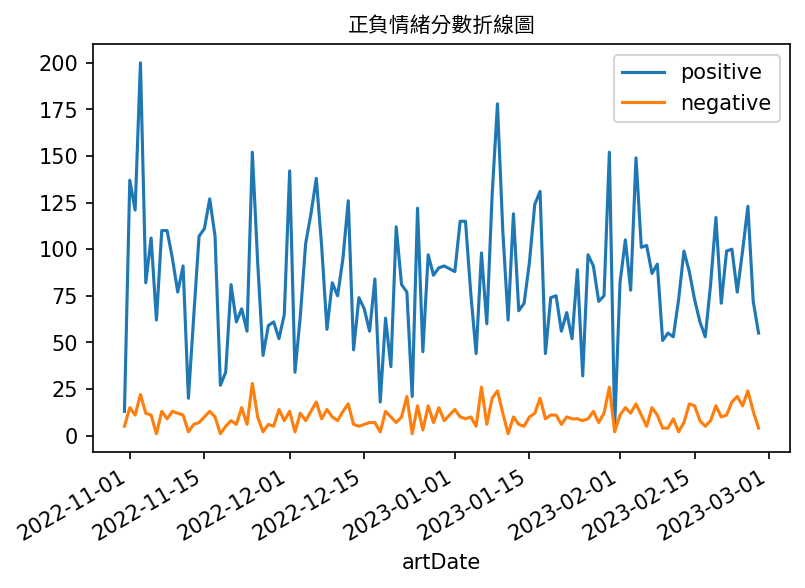

In [10]:
colors = ["tab:blue",  "tab:orange"]
pos = sentiment_count[sentiment_count['sentiments']=='positive']
neg = sentiment_count[sentiment_count['sentiments']=='negative']

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos['artDate'],
       pos['size'],
       color = colors[0])
ax.plot(neg['artDate'],
       neg['size'],
       color = colors[1])

plt.xlabel('artDate')
# plt.ylabel('size')
ax.legend(['positive','negative'], loc ='upper right') 
fig.autofmt_xdate()
plt.title('正負情緒分數折線圖', fontproperties=fprop) #記得加上才能顯示中文
plt.show()

畫出每天的情緒總分數，可以看到正面的分數幾乎每天都超過負面，是個氣氛和諧的討論版。

### 3.4 正負向情緒分數比例折線圖圖

In [11]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count

,artDate,sentiments,size,ratio
0,2022-10-31,negative,5,0.277778
1,2022-10-31,positive,13,0.722222
2,2022-11-01,negative,15,0.098684
3,2022-11-01,positive,137,0.901316
4,2022-11-02,negative,11,0.083333
...,...,...,...,...
233,2023-02-25,positive,123,0.836735
234,2023-02-26,negative,13,0.152941
235,2023-02-26,positive,72,0.847059
236,2023-02-27,negative,4,0.067797


In [12]:
pos = sentiment_count[sentiment_count['sentiments']=='positive']
neg = sentiment_count[sentiment_count['sentiments']=='negative']

Text(0.5, 1.0, '正負情緒比例折線圖')

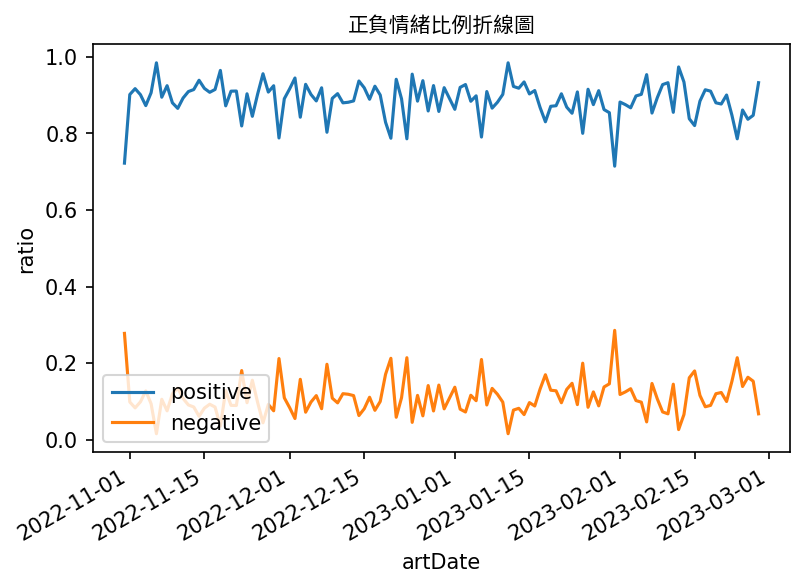

In [13]:
fig, ax = plt.subplots()

ax.plot(pos['artDate'],
       pos['ratio'],
       color = colors[0])
ax.plot(neg['artDate'],
       neg['ratio'], 
       color = colors[1])

plt.xlabel('artDate')
plt.ylabel('ratio')
ax.legend(['positive','negative'], loc ='lower left') 
fig.autofmt_xdate()
plt.title('正負情緒比例折線圖', fontproperties=fprop)
# line_date = [datetime.strptime(datestr,"%Y-%m-%d") for datestr in ['2021-03-18','2021-03-19','2021-03-25','2021-03-26']]
# plt.vlines(line_date,0,1,color="red")
# plt.vlines(datetime.strptime('2021-03-18',"%Y-%m-%d"),0,1,color="red")

In [14]:
neg.sort_values("ratio", ascending=False).head()

,artDate,sentiments,size,ratio
182,2023-01-31,negative,2,0.285714
0,2022-10-31,negative,5,0.277778
228,2023-02-23,negative,21,0.214286
106,2022-12-23,negative,21,0.214286
100,2022-12-20,negative,10,0.212766


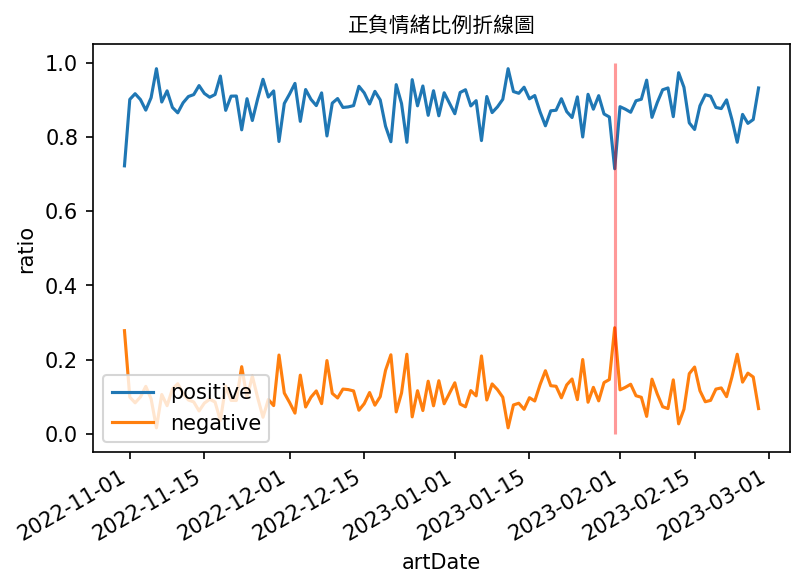

In [15]:
# 加入紅色的垂直線
fig, ax = plt.subplots()

ax.plot(pos['artDate'],
       pos['ratio'],
       color = colors[0])
ax.plot(neg['artDate'],
       neg['ratio'], 
       color = colors[1])

plt.xlabel('artDate')
plt.ylabel('ratio')
ax.legend(['positive','negative'], loc ='lower left') 
fig.autofmt_xdate()
plt.title('正負情緒比例折線圖', fontproperties=fprop)
plt.vlines(datetime.strptime('2023-01-31',"%Y-%m-%d"),0,1,color="red", alpha = 0.4)


透過上圖我們可以發現，ptt 美食版討論的風氣還是比較正向，2023-01-31 是負面情緒比例相對較高的時候。

### 3.5 文字雲
針對不同日期畫出該天的文字雲，如果文字雲中的字詞大小越大，代表出現頻率越高

In [16]:
pos.sort_values("size", ascending=False).head()

,artDate,sentiments,size,ratio
7,2022-11-03,positive,200,0.900901
139,2023-01-09,positive,178,0.881188
49,2022-11-24,positive,152,0.844444
181,2023-01-30,positive,152,0.853933
191,2023-02-04,positive,149,0.897590


#### 2022-11-03 文字雲
2022-11-03 是正面詞彙次數最高的一天。我們可以用文字雲來觀察，美食版在這天最常出現的正面情緒字有哪些。

In [17]:
mask = (ptt_liwc_df.artDate == datetime(2022,11,3)) & (ptt_liwc_df['sentiments']=='positive')
ptt_df_1103 = ptt_liwc_df.loc[mask, ['artDate','word']]
wc_1103=ptt_df_1103.groupby(['word']).size().to_dict()
wc_1103

{'不錯': 15,
 '乾淨': 3,
 '享受': 1,
 '值得': 2,
 '優惠': 7,
 '優雅': 1,
 '優點': 1,
 '光亮': 1,
 '免費': 3,
 '可口': 3,
 '和平': 1,
 '喜出望外': 1,
 '喜愛': 4,
 '喜歡': 18,
 '大方': 1,
 '大膽': 1,
 '好吃': 23,
 '完美': 4,
 '容易': 1,
 '富有': 2,
 '幫忙': 2,
 '幸運': 1,
 '很棒': 3,
 '忠實': 1,
 '快樂': 1,
 '想像': 1,
 '愉快': 1,
 '感恩': 1,
 '感謝': 1,
 '成功': 1,
 '擁護': 1,
 '最佳': 1,
 '最愛': 1,
 '有用': 1,
 '有趣': 1,
 '朋友': 12,
 '極好': 1,
 '歡迎': 1,
 '決定': 3,
 '活潑': 1,
 '流行': 1,
 '浪漫': 3,
 '溫和': 1,
 '溫暖': 2,
 '滿意': 2,
 '滿足': 3,
 '漂亮': 2,
 '相信': 1,
 '福利': 1,
 '突出': 1,
 '簡單': 10,
 '細心': 1,
 '絕妙': 1,
 '美味': 5,
 '肯定': 1,
 '自信': 1,
 '自在': 2,
 '舒服': 2,
 '舒適': 1,
 '著迷': 1,
 '親切': 2,
 '誘人': 1,
 '謝謝': 1,
 '讚不絕口': 3,
 '豐富': 8,
 '輕鬆': 2,
 '迷人': 2,
 '適合': 6,
 '驚喜': 1,
 '鮮明': 1,
 '鮮美': 2}

(-0.5, 399.5, 199.5, -0.5)

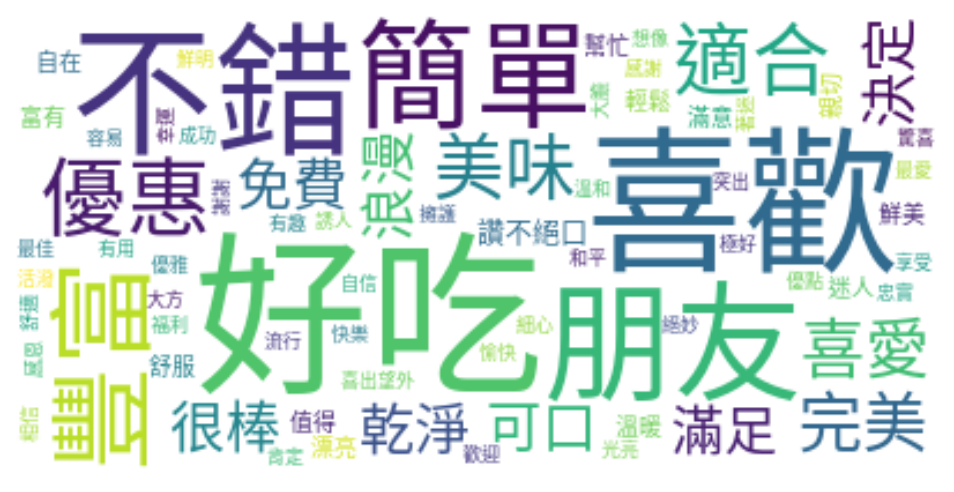

In [18]:
# wordcloud 的 input 是 dictionary
font_path = './SourceHanSansTW-Regular.otf' #中文字型路徑
cloud = WordCloud(max_words=200, background_color="white", font_path=font_path)
cloud.generate_from_frequencies(wc_1103)
# 繪圖
plt.figure(figsize=(8,4), dpi=150)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
# plt.show()

可以發現有「優惠、好吃、浪漫、美味、親切」等詞彙較多，同時也是評論餐廳中較常出現的面向。除此之外，也有「活潑、大膽」等不常用來形容食物的詞彙。

### 3.6 情緒代表字
從整個文集中計算出正負向情緒字的出現詞頻，並找出情緒的代表字

In [19]:
word_count = ptt_liwc_df.groupby(['word', 'sentiments']).size().reset_index()
word_count = word_count.rename(columns={0: 'size'})
word_count = word_count.sort_values(['size'],ascending=False)
word_count

,word,sentiments,size
148,好吃,positive,1075
15,不錯,positive,959
111,喜歡,positive,837
301,朋友,positive,457
449,美味,positive,407
...,...,...,...
186,平安,positive,1
418,空洞,negative,1
183,幫手,positive,1
180,帥氣,positive,1


In [20]:
word_of_pos = word_count.loc[(word_count['sentiments'] == 'positive')]
word_of_pos

,word,sentiments,size
148,好吃,positive,1075
15,不錯,positive,959
111,喜歡,positive,837
301,朋友,positive,457
449,美味,positive,407
...,...,...,...
412,神聖,positive,1
186,平安,positive,1
183,幫手,positive,1
180,帥氣,positive,1


In [21]:
word_of_neg = word_count.loc[(word_count['sentiments'] == 'negative')]
word_of_neg

,word,sentiments,size
105,問題,negative,85
274,擔心,negative,63
526,錯過,negative,56
502,負擔,negative,49
141,失望,negative,40
...,...,...,...
409,瞧不起,negative,1
197,強迫,negative,1
195,強求,negative,1
194,強勢,negative,1


/home/evan19983314/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == "":
/home/evan19983314/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0.5, 1.0, '負向情緒總數')

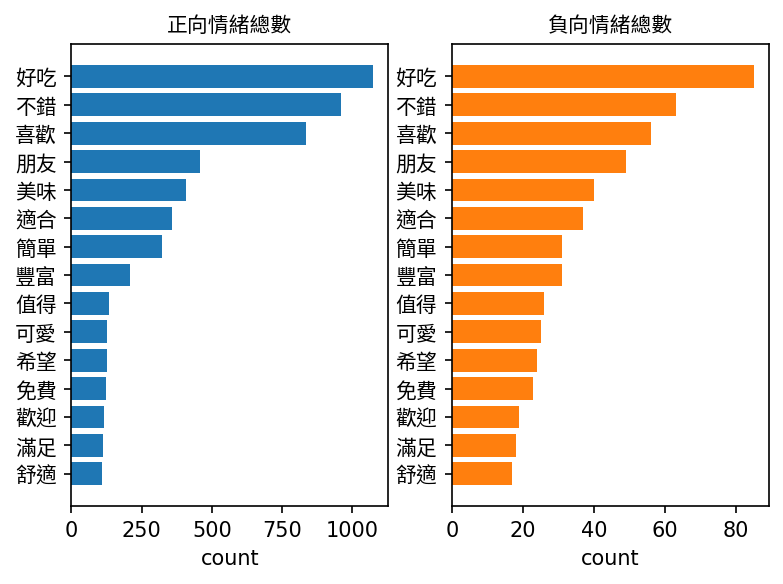

In [22]:
pos = word_count[word_count['sentiments']=='positive'].sort_values(['size'],ascending=True)
pos = pos[-15:]
neg = word_count[word_count['sentiments']=='negative'].sort_values(['size'],ascending=True)
neg = neg[-15:]
fig, ax = plt.subplots(1,2)

ax[0].barh(pos['word'],
           pos['size'],
           color = colors[0]
           )
ax[0].set_xlabel('count')
ax[0].set_yticklabels(pos['word'], fontproperties=fprop)
ax[0].set_title('正向情緒總數',fontproperties=fprop)

ax[1].barh(neg['word'], 
           neg['size'],
           color = colors[1])
ax[1].set_xlabel('count')
ax[1].set_yticklabels(pos['word'], fontproperties=fprop)
ax[1].set_title('負向情緒總數', fontproperties=fprop)

另外，也可以依據不同日期觀察情緒代表字的變化
#### 2022-11-03 正負情緒代表字

In [23]:
mask = (ptt_liwc_df.artDate == datetime(2022,11,3)) & (~ptt_liwc_df['sentiments'].isna())
ptt_df_1103 = ptt_liwc_df.loc[mask, ['artDate','word', 'sentiments']]
ptt_df_1103_senti = ptt_df_1103.groupby(['sentiments', 'word'], as_index=False).size()
ptt_df_1103_senti.sort_values('size', ascending=False)

,sentiments,word,size
35,positive,好吃,23
32,positive,喜歡,18
19,positive,不錯,15
54,positive,朋友,12
69,positive,簡單,10
...,...,...,...
37,positive,容易,1
34,positive,大膽,1
33,positive,大方,1
30,positive,喜出望外,1


/home/evan19983314/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == "":
/home/evan19983314/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


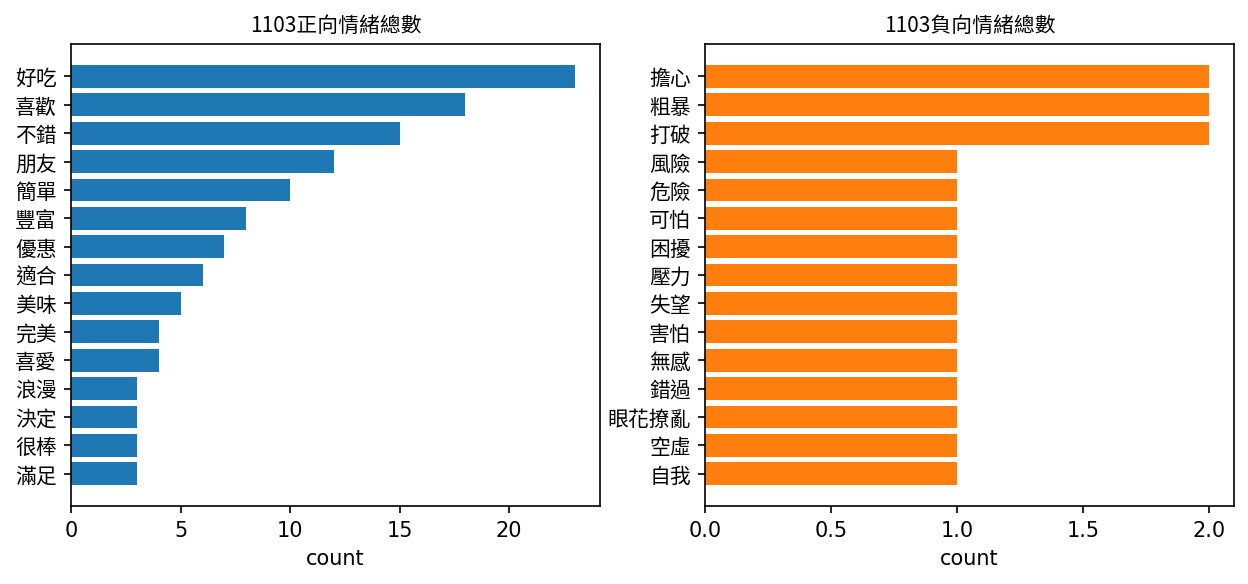

In [24]:
pos = ptt_df_1103_senti[(ptt_df_1103_senti['sentiments']=='positive')].sort_values(['size'],ascending=True)
pos = pos[-15:]
neg = ptt_df_1103_senti[ptt_df_1103_senti['sentiments']=='negative'].sort_values(['size'],ascending=True)
neg = neg[-15:]
fig, ax = plt.subplots(1,2, figsize=(10, 4))

ax[0].barh(pos['word'],
           pos['size'],
           color = colors[0])
ax[0].set_xlabel('count')
ax[0].set_title('1103正向情緒總數', fontproperties=fprop)
ax[0].set_yticklabels(pos['word'], fontproperties=fprop)

ax[1].barh(neg['word'], 
           neg['size'],
           color = colors[1])
ax[1].set_xlabel('count')
ax[1].set_title('1103負向情緒總數', fontproperties=fprop)
ax[1].set_yticklabels(neg['word'], fontproperties=fprop)
plt.show()

### 3.7 每日情緒分數趨勢

In [25]:
sentiment_count

,artDate,sentiments,size,ratio
0,2022-10-31,negative,5,0.277778
1,2022-10-31,positive,13,0.722222
2,2022-11-01,negative,15,0.098684
3,2022-11-01,positive,137,0.901316
4,2022-11-02,negative,11,0.083333
...,...,...,...,...
233,2023-02-25,positive,123,0.836735
234,2023-02-26,negative,13,0.152941
235,2023-02-26,positive,72,0.847059
236,2023-02-27,negative,4,0.067797


In [26]:
ptt_sentiment_value = sentiment_count.pivot_table(index='artDate', columns='sentiments', values='size', fill_value=0).reset_index().rename_axis(None, axis=1)
ptt_sentiment_value.head()

,artDate,negative,positive
0,2022-10-31,5,13
1,2022-11-01,15,137
2,2022-11-02,11,121
3,2022-11-03,22,200
4,2022-11-04,12,82


In [27]:
ptt_sentiment_value['sentiment_value'] = ptt_sentiment_value['positive'] - ptt_sentiment_value['negative']
ptt_sentiment_value.head()

,artDate,negative,positive,sentiment_value
0,2022-10-31,5,13,8
1,2022-11-01,15,137,122
2,2022-11-02,11,121,110
3,2022-11-03,22,200,178
4,2022-11-04,12,82,70


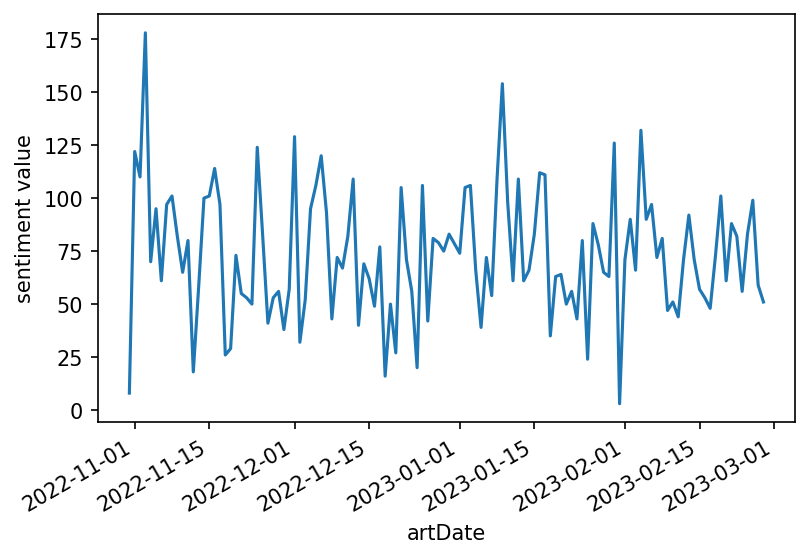

In [28]:
fig, ax = plt.subplots()
ax.plot(ptt_sentiment_value['artDate'], ptt_sentiment_value["sentiment_value"])
ax.set_xlabel('artDate')
ax.set_ylabel('sentiment value')
fig.autofmt_xdate()